# Dates and times in pandas

Pandas can handle dates and times thanks to specific data types.

It has objects for points in time as well as periods of time with methods and attributes that reflect time related details

Sequences of dates and periods can be found as:
- series
- dataframe columns
- indexes

# Timestamp, Period, Frequency, date_range

In [ ]:
import pandas as pd 
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt

time_stamp = pd.Timestamp(datetime(2024,1,1))
pd.Timestamp('2024-01-01') == time_stamp

In [ ]:
type(time_stamp)

In [ ]:
time_stamp

In [ ]:
time_stamp.year

In [ ]:
time_stamp.month

In [ ]:
time_stamp.day_of_week

In [ ]:
period = pd.Period('2024-01')
period

In [ ]:
period.asfreq('D')

In [ ]:
period.to_timestamp()

In [ ]:
period.to_timestamp().to_period('M')

In [ ]:
period + 2

In [ ]:
index = pd.date_range(start='2017-1-1', periods=12, freq='ME')
index

In [ ]:
index[0]

In [ ]:
index.to_period()

There are many frequency aliases besides 'ME' and 'D':

| Period   | Alias |
|----------|-------|
| Hour     | H     |
| Day      | D     |
| Week     | W     |
| Month    | ME    |
| Quarter  | Q     |
| Year     | A     |

These may be further differentiated by beginning/end of period, or business-specific definition.

You can also access these `pd.Timestamp()` attributes:

| attribute                            |
|--------------------------------------|
| .second, .minute, .hour              |
| .day, .month, .quarter, .year        |
| .weekday                             |
| dayofweek                            |
| .weekofyear                          |
| .dayofyear                           |

In [ ]:
# Parsing strings into datetime

In [ ]:
google = pd.read_csv('../data/stock_data/google.csv')
google.head()

In [ ]:
google.info()

In [ ]:
google['Date'] = pd.to_datetime(google['Date'])

In [ ]:
google.set_index('Date', inplace=True)

In [ ]:
google.head()

In [ ]:
sns.set()
google.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

In [ ]:
google.loc['2015-1'].info()

In [ ]:
google.loc['2015':'2016'].describe()

In [ ]:
# We can add frequency information to the dataframe with 

google.asfreq('D')

In [ ]:
google.info()

In [ ]:
google.head()

We have empty values in our dataframe due to the **upsampling** (including weekendays)

**'B'** frequency stands for business day

In [ ]:
google.asfreq('B').head()

# Timeseries Calculations 

## Shifting and Lagging

In [ ]:
google = pd.read_csv('../data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')
google.info()

In [ ]:
google['shifted'] = google['Close'].shift(1)
google['lagged'] = google['Close'].shift(-1)
google

## Calculate one-period percent change

In [ ]:
google['change']= google.Close.div(google.shifted)
google

## Diff

In [ ]:
google['diff'] = google.Close.diff() 
google

## Percent Change

In [ ]:
google['pct_change'] = google.Close.pct_change()
google

## Compare timeseries growth rate

Whats often done is dividing the whole series by its first data point (and eventually multiply by 100)


In [ ]:
google.Close.iloc[0]

In [ ]:
normalized = google.Close.div(google.Close.iloc[0]).mul(100)
normalized

In [ ]:
normalized.plot()

In [ ]:
prices = pd.read_csv('../data/stock_data/stock_data.csv', parse_dates=['Date'], index_col='Date')[['AAPL', 'AMZN', 'TEF']]
prices

In [ ]:
prices.plot()

In [ ]:
prices = prices.div(prices.iloc[0])

In [ ]:
prices.plot()

In [ ]:
sp500 = pd.read_csv('../data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
sp500.info()

In [ ]:
prices.info()

In [ ]:
sp500 = sp500.loc['2010-01-04':'2016-12-30']

In [ ]:
sp500.info()

In [ ]:
prices = pd.concat([prices, sp500], axis=1)

In [ ]:
prices

In [ ]:
prices.isna().sum()

In [ ]:
prices = prices.dropna()

In [ ]:
prices.isna().sum()

In [ ]:
prices['SP500'] = prices['SP500'].div(prices['SP500'].iloc[0])

In [ ]:
prices

In [ ]:
prices.plot()

## Resampling

When we change the frequency of a dataset it affects the data itself too.

When upsampling you have to tell pandas how to fill the new created datapoints (fill or interpolate)

When downsampling you have to specify how to aggregate the values too.

In [ ]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))

In [ ]:
# Import data here
data = pd.read_csv('../data/stock_data/unrate_2000.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()

In [ ]:
# Import & inspect data here
data = pd.read_csv('../data/stock_data/debt_unemployment.csv', parse_dates = ['date'], index_col='date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y='Unemployment')
plt.show()

# Downsampling and aggregation methods

Downsampling its about reducing the frequency: daily to monthly, hourly to daily...

Mean? Median? Last value? 



In [ ]:
ozone = pd.read_csv('../data/air_quality_data/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone

In [ ]:
ozone.info()

In [ ]:
ozone.asfreq('D')
ozone.info()

In [ ]:
# convert to monthly 
ozone.resample('M').mean().head()

In [ ]:
#we can aggregate in different manners at once too 
ozone.resample('M').agg(['mean', 'std']).head()

In [ ]:
ozone = ozone.loc['2016':]
ax=ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

# Window Functions

Windows specify sub periods of your time series

Calculate metrics for sub periods inside the window

Create a new time series of metrics

There are two main window types: 
- Rolling
- Expanding

## Rolling Windows

In [ ]:
google = pd.read_csv('../data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')
ax = google.plot()

In [ ]:
ax = google.plot()
google.rolling(window='30D').mean().plot(ax=ax)
plt.show()

In [ ]:
r = google.Close.rolling('30D').agg(['mean', 'std'])
r.plot(subplots=True)

In [ ]:
# Resample, interpolate and inspect ozone data here
ozone = ozone.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = ozone.Ozone.rolling(60)

# Insert the rolling quantiles to the monthly returns
ozone['q10'] = rolling.quantile(0.1)
ozone['q50'] = rolling.quantile(0.5)
ozone['q90'] = rolling.quantile(0.9)

# Plot the data
ozone.plot()
plt.show()

## Expanding Windows

Calculate metrics for periods up to current date

New time series reflects all historical values

Two options in pandas
- *.expanding()* (like rolling)
- *.cumsum()*, *.cumprod()*, *.cummin()*, *.cummax()*


In [ ]:
df = pd.DataFrame({'data': range(5)})
df['expanding sum']=df.data.expanding().sum() 
df['cumulative sum']=df.data.cumsum() 

df

In [ ]:
google = pd.read_csv('../data/stock_data/google.csv', parse_dates=['Date'], index_col='Date')
google['running min'] = google.Close.expanding().min() 
google['running max'] = google.Close.expanding().max() 

In [ ]:
google.plot()

# SP500 price simulation



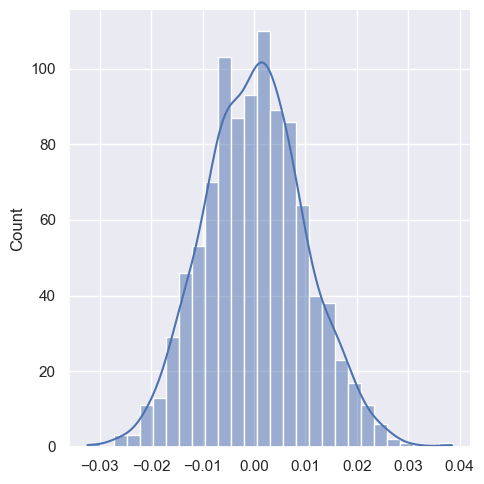

In [158]:
from numpy.random import normal, seed 
from scipy.stats import norm

seed(42)

random_returns = normal(loc=0, scale=0.01, size=1000)
sns.displot(random_returns, kde=True)

<Axes: >

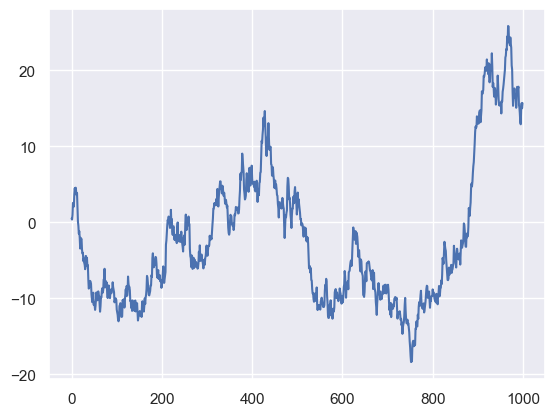

In [159]:
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()

In [160]:
data = pd.read_csv('../data/stock_data/sp500.csv', parse_dates=['date'], index_col='date')
data

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44
...,...
2016-12-23,2263.79
2016-12-27,2268.88
2016-12-28,2249.92


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

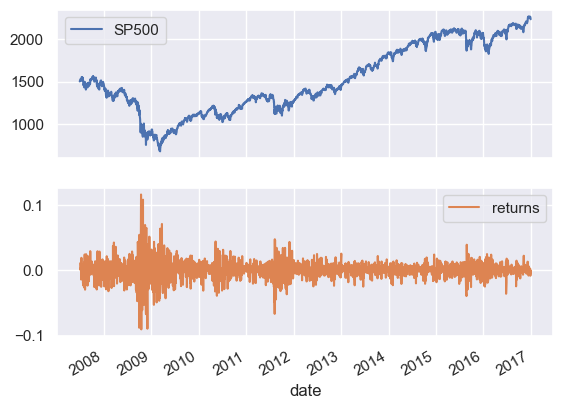

In [161]:
data['returns'] = data.SP500.pct_change() 
data.plot(subplots=True) 


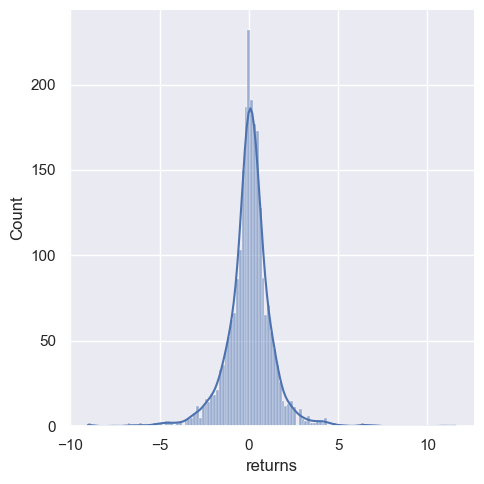

In [162]:
sns.displot(data.returns.dropna().mul(100), kde=True)

In [163]:
from numpy.random import choice 

sample = data.returns.dropna() 
n_obs = data.returns.count() 
random_walk = choice(sample, size=n_obs) 
random_walk = pd.Series(random_walk, index=sample.index) 
random_walk.head()

date
2007-07-02    0.005007
2007-07-03    0.040729
2007-07-05   -0.000322
2007-07-06   -0.008404
2007-07-09    0.002119
dtype: float64

# Relationships between time series: Correlation

**Correlation coefficient**: how similar is the pairwise movement (covariance) of two variables around their averages


In [168]:
data = pd.read_csv('../data/stock_data/asset_classes.csv', parse_dates=['DATE'], index_col='DATE')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB


In [169]:
daily_returns = data.pct_change()
daily_returns

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,NaN,NaN,NaN,NaN
2007-07-02,0.010696,0.002014,0.003084,0.009082
2007-07-03,0.003580,-0.002333,0.010377,0.004219
2007-07-05,0.000348,-0.004652,-0.002054,0.005601
2007-07-06,0.003304,-0.002099,-0.012426,0.013786
...,...,...,...,...
2017-06-20,-0.006697,0.004393,-0.003677,-0.020344
2017-06-21,-0.000583,0.001769,0.000441,-0.019843
2017-06-22,-0.000456,-0.000016,0.003488,0.001177


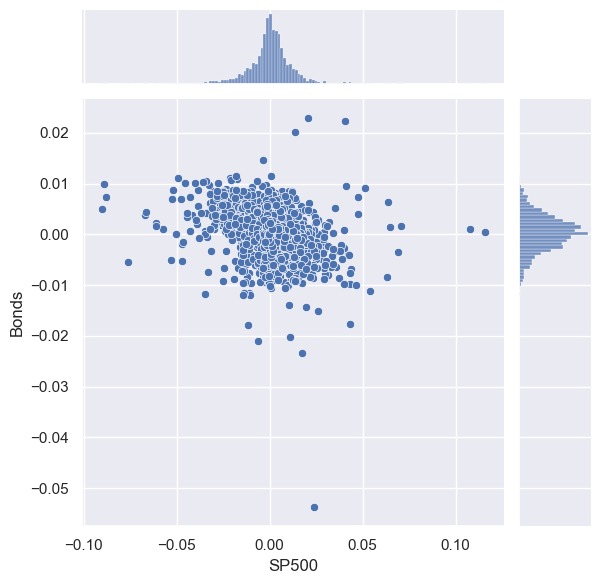

In [170]:
sns.jointplot(x='SP500', y='Bonds', data=daily_returns)

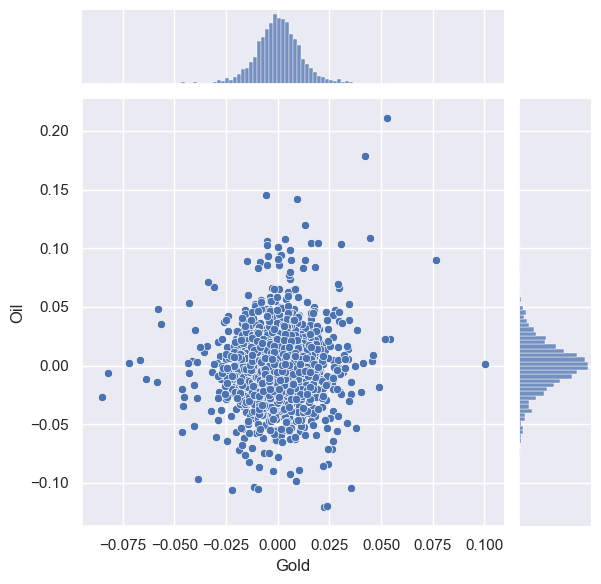

In [171]:
sns.jointplot(x='Gold', y='Oil', data=daily_returns)

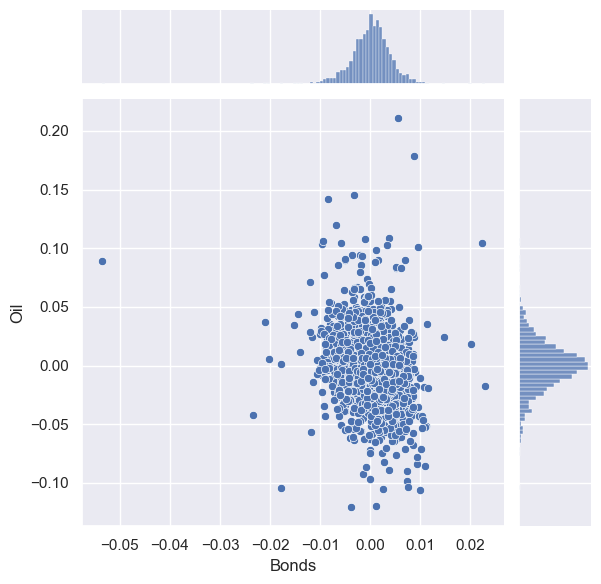

In [175]:
sns.jointplot(x='Bonds', y='Oil', data=daily_returns)

In [179]:
correlations = daily_returns.corr()
correlations

,SP500,Bonds,Gold,Oil
SP500,1.000000,-0.314890,-0.006546,0.335353
Bonds,-0.314890,1.000000,0.028882,-0.215279
Gold,-0.006546,0.028882,1.000000,0.104272
Oil,0.335353,-0.215279,0.104272,1.000000


<Axes: >

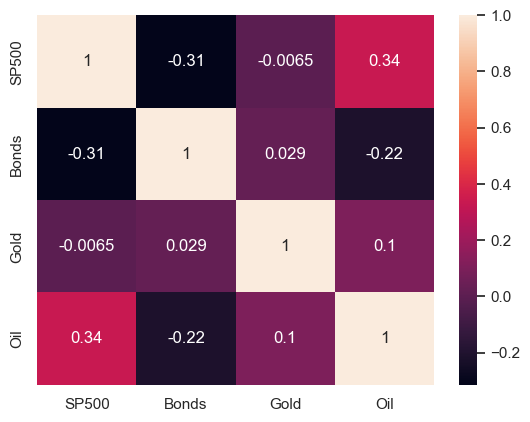

In [180]:
sns.heatmap(correlations, annot=True)